# Analysis of exports and imports of sheep and goats in Ireland.

In [1]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
import numpy as np  
import scipy as sp

# EXPORT 2021




In [2]:
df = pd.read_csv('ANUAL_EXPORT.gz')
df.head(10)

,DATAFLOW,LAST UPDATE,freq,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DS-045409(1.0),15/11/22 11:00:00,A,FR,IE,104,2,VALUE_IN_EUROS,2021,11333,NaN
1,ESTAT:DS-045409(1.0),15/11/22 11:00:00,A,NL,IE,104,2,VALUE_IN_EUROS,2021,37068,NaN


In [3]:
df.shape

(2, 11)

In [4]:
df.sort_values(by='OBS_VALUE', ascending=False, inplace=True, ignore_index=True)

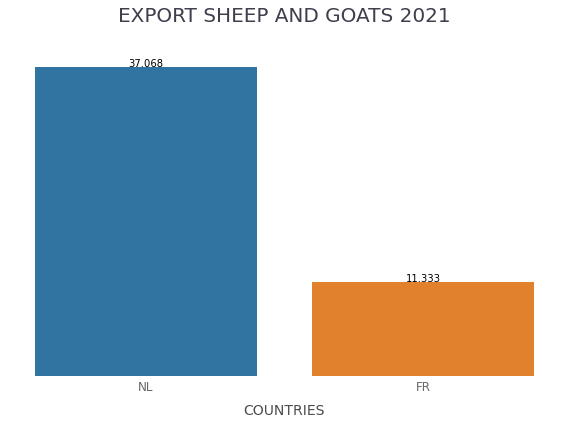

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='reporter', y='OBS_VALUE', data = df, ax=ax) 

ax.set_frame_on(False)
ax.set_title('EXPORT SHEEP AND GOATS 2021', loc='center', pad=30, fontdict={'fontsize':20}, 
             color='#3f3f4e') 

ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x', length=0, labelsize=12, colors='dimgrey')
ax.set_xlabel('COUNTRIES', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c') 

plt.tight_layout();

for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 22,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), ha = 'center')

In [6]:
def get_trade(state, flow):
    filename = f'trade_{flow}_{state}.zip'
    if os.path.exists(filename) == False:
        df = pd.read_json(f'https://ec.europa.eu/agrifood/api/taxud/weeklyData/{flow}?memberStateCodes={state}&sectors=Sheep')
        df.to_csv(filename, index=False,compression='zip')
        print(f"Data from API save as {filename}")
    else:
        df = pd.read_csv(filename)
        print(f"The file {filename} was read.")
    
    return df

In [7]:
trade_export = get_trade('IE', 'export')
trade_export.sample(3)

The file trade_export_IE.zip was read.


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
3047,Sheep,2020,26,IE,Ireland,CI,Ivory Coast,Offals,2069099,206909900,10,0,2010,0.67,3000,3000,1.00
1,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042230,204223000,10,0,9091,3.59,2532,2532,1.00
4815,Sheep,2017,8,IE,Ireland,CH,Switzerland,Frozen Meat,2044390,204439000,10,0,17495,17.00,1029,1862,1.81


In [8]:
print(trade_export['partner'].unique())
trade_export.head(10)

['United Kingdom' 'Ivory Coast' 'Canada' 'Singapore' 'Philippines'
 'Switzerland' 'United Arab Emirates' 'Japan' 'Ghana'
 'Trinidad and Tobago' 'Hong Kong' 'United States of America'
 'New Zealand' 'China' 'Qatar' 'Libya'
 'Countries and territories not specified' 'Kuwait' 'South Africa'
 'European Union' 'Cape Verde' 'Australia' 'Vietnam' 'Congo' 'Uganda'
 'Central African Republic' 'Tanzania' 'Ukraine' 'Comoros' 'Gabon'
 'Albania' 'Turkey' 'Liberia' 'Taiwan' 'Norway' 'India' 'Maldives'
 'Lebanon' 'Tunisia' 'Bahrain']


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
0,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042300,204230000,10,0,15051,11.87,1268,2295,1.81
1,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042230,204223000,10,0,9091,3.59,2532,2532,1.00
2,Sheep,2022,52,IE,Ireland,CI,Ivory Coast,Fresh meat,2041000,204100000,10,0,21500,0.86,25000,25000,1.00
3,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042250,204225000,10,0,815,9.59,85,85,1.00
4,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Frozen Meat,2044290,204429000,10,0,15003,5.33,2817,2817,1.00
5,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Preparations,16029091,1602909100,10,0,365751,7.56,48390,48390,1.00
6,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2041000,204100000,10,0,24713,6.37,3881,3881,1.00
7,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042210,204221000,10,0,40128,7.08,5667,5667,1.00
8,Sheep,2022,52,IE,Ireland,CA,Canada,Fresh meat,2042250,204225000,10,0,77950,5.95,13092,13092,1.00
9,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Frozen Meat,2044310,204431000,10,0,44608,4.76,9365,15640,1.67


# IMPORT 2021

In [9]:
df2 = pd.read_csv('ANUAL_IMPORT.gz')
df2.head()

,DATAFLOW,LAST UPDATE,freq,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DS-045409(1.0),15/11/22 11:00:00,A,DE,IE,104,1,VALUE_IN_EUROS,2021,43450,NaN
1,ESTAT:DS-045409(1.0),15/11/22 11:00:00,A,FR,IE,104,1,VALUE_IN_EUROS,2021,1382429,NaN
2,ESTAT:DS-045409(1.0),15/11/22 11:00:00,A,IT,IE,104,1,VALUE_IN_EUROS,2021,910309,NaN
3,ESTAT:DS-045409(1.0),15/11/22 11:00:00,A,NL,IE,104,1,VALUE_IN_EUROS,2021,822,NaN


In [10]:
df2.shape

(4, 11)

In [11]:
df2.sort_values(by='OBS_VALUE', ascending=False, inplace=True, ignore_index=True)

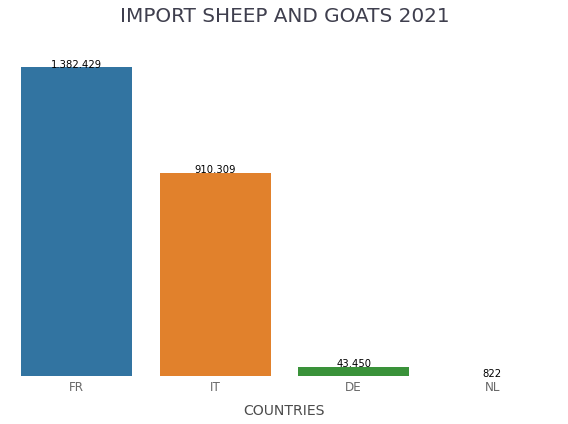

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='reporter', y='OBS_VALUE', data = df2, ax=ax) 

ax.set_frame_on(False)
ax.set_title('IMPORT SHEEP AND GOATS 2021', loc='center', pad=30, fontdict={'fontsize':20}, 
             color='#3f3f4e') 

ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x', length=0, labelsize=12, colors='dimgrey')
ax.set_xlabel('COUNTRIES', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c') 

plt.tight_layout();

for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 22,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), ha = 'center')

In [13]:
trade_import = get_trade('IE','import')
print(trade_import['partner'].unique())
trade_import.head(2)

The file trade_import_IE.zip was read.
['United Kingdom' 'European Union' 'Australia' 'New Zealand' 'Norway'
 'United States of America' 'Turkey' 'Iceland']


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
0,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Preparations,16029091,1602909100,4000,100,233,6.94,34,34,1.0
1,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2041000,204100010,4000,300,286512,6.83,41966,41966,1.0


# PRICE

In [14]:
# getting price by API if the file isn't avaible
def get_prices(state):
    filename = f'price_{state}.zip'
    if os.path.exists(filename) == False:
        df = pd.read_json(f'https://ec.europa.eu/agrifood/api/sheepAndGoat/prices?memberStateCodes={state}')
        df.to_csv(filename, index=False,compression='zip')
        print(f"Data from API save as {filename}")
    else:
        df = pd.read_csv(filename)
        print(f"The file {filename} was read.")
    
    return df

In [15]:
price_IE = get_prices('IE')
price_IE.sample(3)

The file price_IE.zip was read.


,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,category,marketName,marketingYear
41,IE,Ireland,21/02/2022,27/02/2022,8,€672.00,100CARC,Heavy Lamb,IE,2022
404,IE,Ireland,09/03/2015,15/03/2015,11,€539.00,100CARC,Heavy Lamb,IE,2015
327,IE,Ireland,29/08/2016,04/09/2016,35,€437.34,100CARC,Heavy Lamb,IE,2016


In [16]:
price_FR = get_prices('FR')
price_FR.head(10)

The file price_FR.zip was read.


,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,category,marketName,marketingYear
0,FR,France,12/12/2022,18/12/2022,50,€857.00,100CARC,Heavy Lamb,FR,2022
1,FR,France,05/12/2022,11/12/2022,49,€851.00,100CARC,Heavy Lamb,FR,2022
2,FR,France,28/11/2022,04/12/2022,48,€852.00,100CARC,Heavy Lamb,FR,2022
3,FR,France,21/11/2022,27/11/2022,47,€836.00,100CARC,Heavy Lamb,FR,2022
4,FR,France,14/11/2022,20/11/2022,46,€829.00,100CARC,Heavy Lamb,FR,2022
5,FR,France,07/11/2022,13/11/2022,45,€815.00,100CARC,Heavy Lamb,FR,2022
6,FR,France,31/10/2022,06/11/2022,44,€804.00,100CARC,Heavy Lamb,FR,2022
7,FR,France,24/10/2022,30/10/2022,43,€800.00,100CARC,Heavy Lamb,FR,2022
8,FR,France,17/10/2022,23/10/2022,42,€796.00,100CARC,Heavy Lamb,FR,2022
9,FR,France,10/10/2022,16/10/2022,41,€795.00,100CARC,Heavy Lamb,FR,2022


In [17]:
prices = pd.concat([price_IE,price_FR], keys=['IRELAND', 'FRANCE'])
prices['price'] = (prices['price'].apply(lambda x: re.sub('\D', '', x)).astype('float')/100)
prices.sample(10)

memberStateCode memberStateName   beginDate     endDate  \
FRANCE  373              FR          France  19/10/2015  25/10/2015   
        59               FR          France  25/10/2021  31/10/2021   
        265              FR          France  13/11/2017  19/11/2017   
        179              FR          France  08/07/2019  14/07/2019   
        5                FR          France  07/11/2022  13/11/2022   
        62               FR          France  04/10/2021  10/10/2021   
IRELAND 290              IE         Ireland  15/05/2017  21/05/2017   
FRANCE  61               FR          France  11/10/2021  17/10/2021   
        176              FR          France  29/07/2019  04/08/2019   
IRELAND 136              IE         Ireland  27/04/2020  03/05/2020   

             weekNumber   price     unit    category marketName  marketingYear  
FRANCE  373          43  634.00  100CARC  Heavy Lamb         FR           2015  
        59           43  760.00  100CARC  Heavy Lamb         FR           2021  
        265          46  655.00  100CARC  Heavy Lamb         FR           2017  
        179          28  586.00  100CARC  Heavy Lamb         FR           2019  
        5            45  815.00  100CARC  Heavy Lamb         FR           2022  
        62           40  746.00  100CARC  Heavy Lamb         FR           2021  
IRELAND 290          20  525.42  100CARC  Heavy Lamb         IE           2017  
FRANCE  61           41  753.00  100CARC  Heavy Lamb         FR           2021  
        176          31  590.00  100CARC  Heavy Lamb         FR           2019  
IRELAND 136          18  564.00  100CARC  Heavy Lamb         IE           2020

In [18]:
def graf_his(dataframe, a, b, year):

    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list


    print(f'qtd. {a}: ', price_a.shape[0])
    print(f'qtd. {b}: ', price_b.shape[0])

    print(f'média dos preços {a}: ', np.mean(price_a))
    print(f'média dos preços {b}: ', np.mean(price_b))

    ##Visualizando as distribuições
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

    ax0.hist(price_a);
    ax0.set_title(f'Preços 100CARC {a} ({year})');

    ax1.hist(price_b);
    ax1.set_title(f'Preços 100CARC {b} ({year})');

qtd. Ireland:  53
qtd. France:  53
média dos preços Ireland:  517.7201886792453
média dos preços France:  673.811320754717


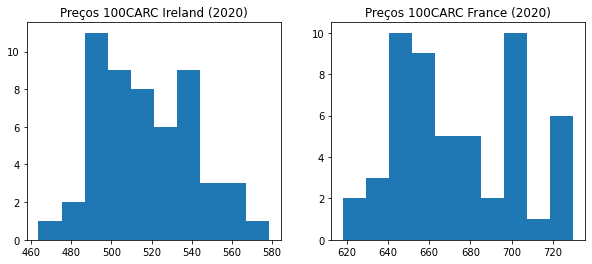

In [19]:
graf_his(prices, 'Ireland', 'France', 2020)

In [20]:
def graf_boxplot(dataframe, a, b, year):
    
    df = dataframe[(dataframe["marketingYear"] == year) &  dataframe['memberStateName'].isin([a,b])] #getting year and coutries

    fig, ax = plt.subplots(figsize=(8,6))
    sns.boxplot(x= 'memberStateName', y= 'price', data = df, ax=ax) 

    ax.set_frame_on(False)
    ax.set_title(f'Prices {a} and {b} ({year})', loc='center', pad=30, fontdict={'fontsize':20}, 
                 color='#3f3f4e') 

    ax.get_yaxis().set_visible(True)
    ax.tick_params(axis='x', length=0, labelsize=12, colors='dimgrey')
    ax.set_xlabel('COUNTRIES', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c')
    ax.set_ylabel('PRICES (€/100CARC)', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c') 

    plt.tight_layout();
    
    plt.show()

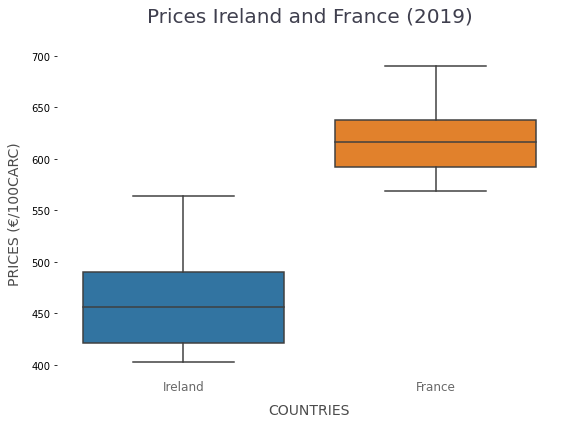

In [21]:
graf_boxplot(prices, 'Ireland', 'France', 2019)

In [22]:
def p_value(dataframe, a, b, year):

    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list

    print(f"p-value da hipótese das tarifas dos homens serem normalmente distribuidos ", stats.normaltest(price_a)[1])
    print(f"p-value da hipótese das tarifas das mulheres serem normalmente distribuidos ", stats.normaltest(price_b)[1])

In [23]:
p_value(prices, 'Ireland', 'France', 2019)

p-value da hipótese das tarifas dos homens serem normalmente distribuidos  0.22107054346749733
p-value da hipótese das tarifas das mulheres serem normalmente distribuidos  0.2379429235433786


In [24]:
def intervalo_conf(dados, significancia=0.95):
    a = 1.0*np.array(dados)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1+significancia)/2., n-1)
    return m-h, m+h

In [25]:
def intervalo_confi(dataframe, a, b, year):

    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list

    print(f"Intervalo de confiança com 95% da tarifa dos homens = ", intervalo_conf(price_a))
    print(f"Intervalo de confiança com 95% da tarifa das mulheres = ", intervalo_conf(price_b))

In [26]:
intervalo_confi(prices, 'Ireland', 'France', 2019)

Intervalo de confiança com 95% da tarifa dos homens =  (449.083460382627, 471.9719242327576)
Intervalo de confiança com 95% da tarifa das mulheres =  (610.181657720077, 626.8568038183844)


In [27]:
def new_test(dataframe, a, b, year):
    
    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list

    z_stat, p_val = stats.mannwhitneyu(price_a, price_b)  
    print(f"O p-value do teste Mann-Whitney-Wilcoxon entre os Dados = ", p_val)

In [28]:
new_test(prices, 'Ireland', 'France', 2019)

O p-value do teste Mann-Whitney-Wilcoxon entre os Dados =  1.5388180538540142e-18


https://www.kaggle.com/code/vabatista/laborat-rio-3-introdu-o-estat-stica/notebook

# DASHBOARD

In [29]:
!pip install dash

In [ ]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.read_csv('trade_export_IE.zip')

fig = px.bar(df, x="product", y="kg", color="partner", barmode="group")
opcoes = list(df['partner'].unique())
opcoes.append("Todas as Lojas")

app.layout = html.Div(children=[
    html.H1(children='EXPORT SHEEP AND GOATS 2021'),
    html.H2(children='Export whitin the countries of the European Union'),
    
    html.Div(children='''
        pensar em um frase.
    '''),
    
    dcc.Dropdown(opcoes, value='Todas as Lojas', id='COUNTRIES'),
    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

@app.callback(

    Output('example-graph', 'figure'),

    Input('COUNTRIES', 'value')

)

def update_output(value):

    if value == "Todas as Lojas":

        fig = px.bar(df, x="product", y="kg", color="partner", barmode="group")

    else:

        tabela_filtrada = df.loc[df["partner"]==value, :]

        fig = px.bar(tabela_filtrada, x="product", y="kg", color="partner", barmode="group")

    return fig

if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [27/Dec/2022 15:59:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 15:59:03] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 15:59:03] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 15:59:03] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 15:59:03] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 15:59:03] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 15:59:04] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 15:59:09] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 15:59:14] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 16:00:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 16:03:32] "POST /_dash-update-component HTTP/1.